noisy

In [2]:
import torch
k = 7
torch.diag(torch.ones(k)) * -k/(k+1) + torch.ones(k, k) / (k+1)

tensor([[-0.7500,  0.1250,  0.1250,  0.1250,  0.1250,  0.1250,  0.1250],
        [ 0.1250, -0.7500,  0.1250,  0.1250,  0.1250,  0.1250,  0.1250],
        [ 0.1250,  0.1250, -0.7500,  0.1250,  0.1250,  0.1250,  0.1250],
        [ 0.1250,  0.1250,  0.1250, -0.7500,  0.1250,  0.1250,  0.1250],
        [ 0.1250,  0.1250,  0.1250,  0.1250, -0.7500,  0.1250,  0.1250],
        [ 0.1250,  0.1250,  0.1250,  0.1250,  0.1250, -0.7500,  0.1250],
        [ 0.1250,  0.1250,  0.1250,  0.1250,  0.1250,  0.1250, -0.7500]])

In [3]:
alpha=0.3

identity = torch.diag(torch.ones(k))
shift_identity = torch.zeros(k, k)
for i in range(k):
    shift_identity[(i+1)%k, i] = 1
opt = -alpha * identity + alpha * shift_identity

opt

tensor([[-0.3000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3000],
        [ 0.3000, -0.3000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.3000, -0.3000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.3000, -0.3000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.3000, -0.3000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.3000, -0.3000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3000, -0.3000]])

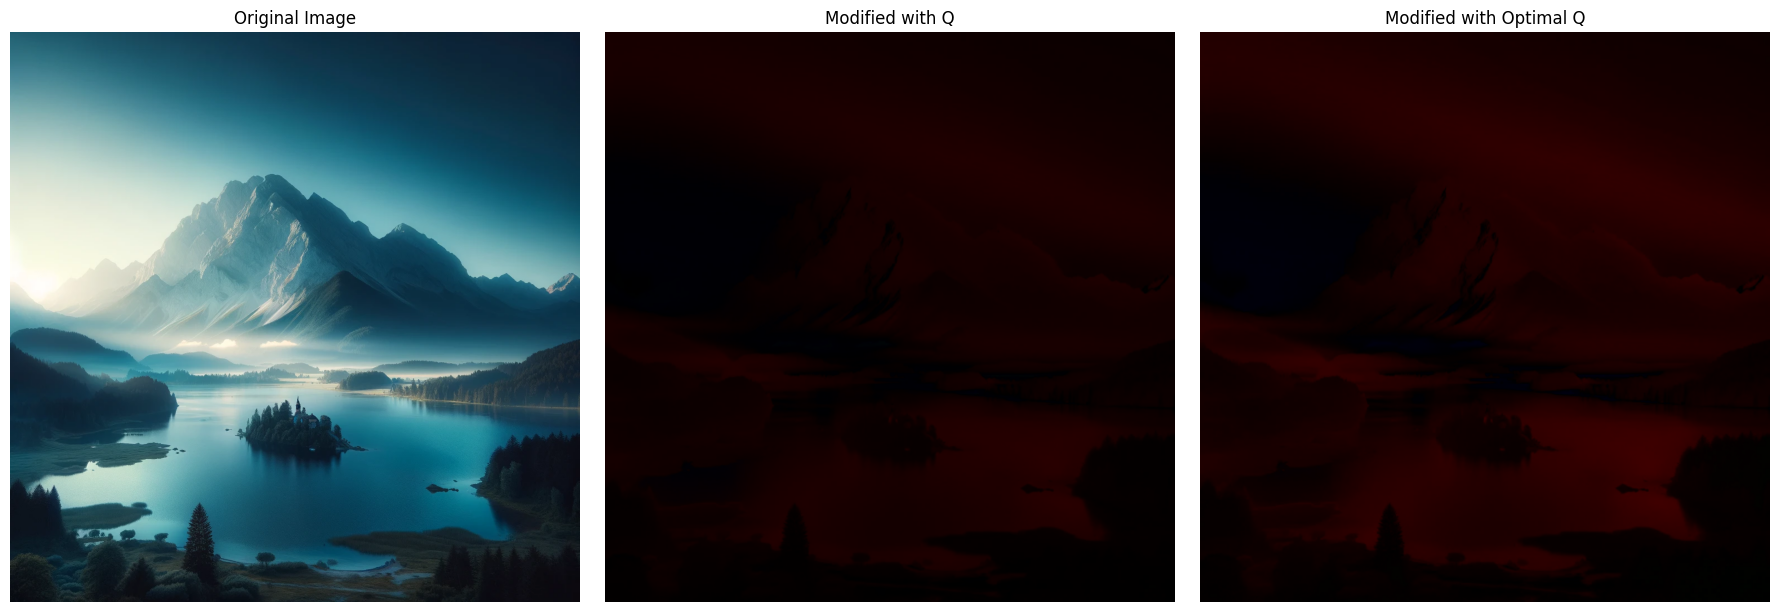

In [1]:
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load the generated image
img_path = 'test.png'
img = Image.open(img_path)

# Convert image to tensor
img_tensor = torch.FloatTensor(np.array(img)).permute(2, 0, 1) / 255.0  # Normalize to [0, 1]

# Define the quality matrix functions
def quality_matrix(k, alpha=0.3):
    identity = torch.diag(torch.ones(k))
    shift_identity = torch.zeros(k, k)
    for i in range(k):
        shift_identity[(i+1)%k, i] = 1
    opt = -alpha * identity + alpha * shift_identity
    return opt

def optimal_quality_matrix(k):
    return torch.diag(torch.ones(k)) * -k/(k+1) + torch.ones(k, k) / (k+1)

# Apply the quality matrices to the image tensor
# Assuming the color channel as the dimension for the quality matrix
k = 3  # For RGB images
alpha = 0.3  # Default alpha value

# Generate the quality matrices
Q = quality_matrix(k, alpha)
Q_optimal = optimal_quality_matrix(k)

# Function to apply matrix and visualize the effect
def apply_quality_matrix_and_visualize(img_tensor, Q):
    # Apply the quality matrix
    modified_img_tensor = torch.einsum('ij,jkl->ikl', Q, img_tensor)
    
    # Ensure the tensor is within the valid range
    modified_img_tensor.clamp_(0, 1)
    
    # Convert back to PIL Image for display
    img_pil = Image.fromarray((modified_img_tensor.permute(1, 2, 0).numpy() * 255).astype(np.uint8))
    return img_pil

# Apply and visualize
img_modified_Q = apply_quality_matrix_and_visualize(img_tensor, Q)
img_modified_Q_optimal = apply_quality_matrix_and_visualize(img_tensor, Q_optimal)

# Display the original and modified images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(img_modified_Q)
axs[1].set_title('Modified with Q')
axs[1].axis('off')

axs[2].imshow(img_modified_Q_optimal)
axs[2].set_title('Modified with Optimal Q')
axs[2].axis('off')

plt.tight_layout()
plt.show()


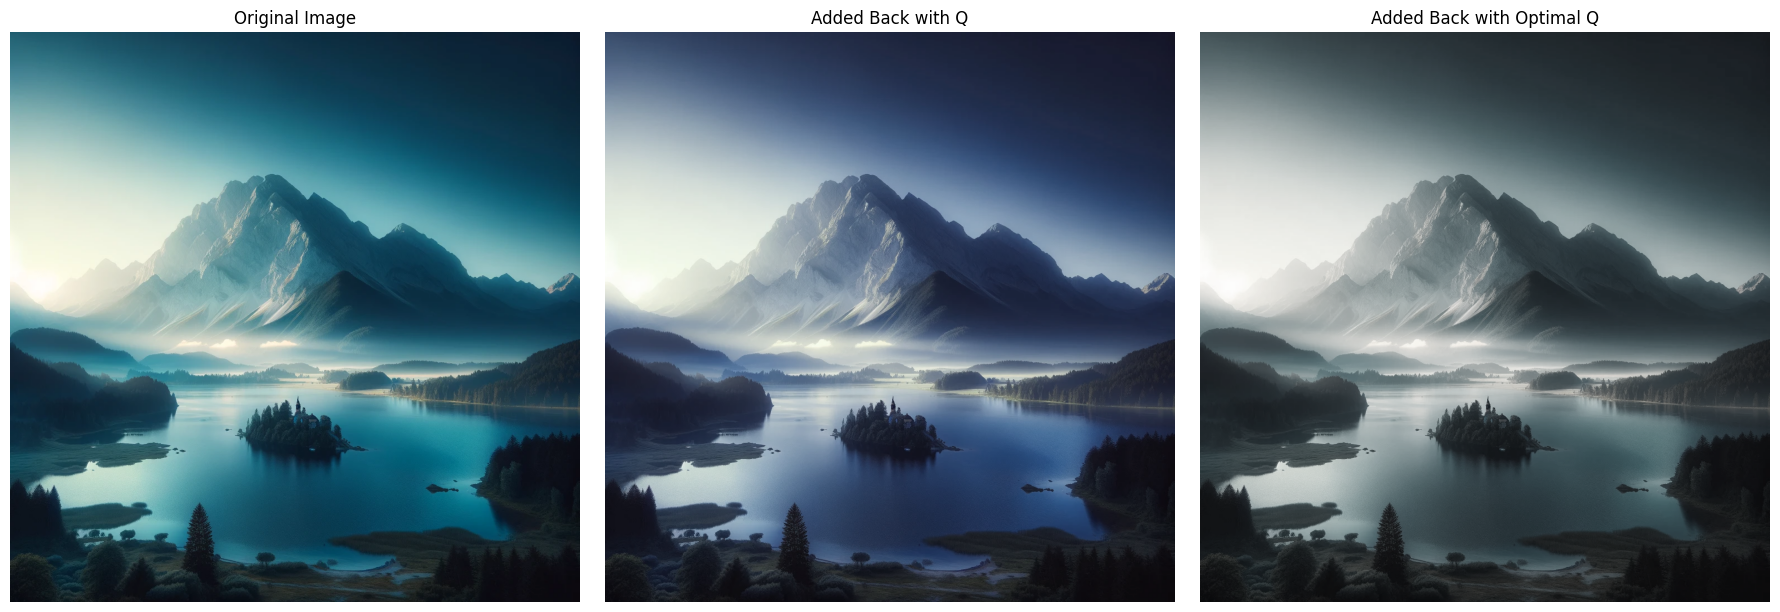

In [2]:
# Function to apply quality matrix, add back to original, and visualize the result
def apply_quality_matrix_add_back_and_visualize(original_img_tensor, Q):
    # Apply the quality matrix
    modified_img_tensor = torch.einsum('ij,jkl->ikl', Q, original_img_tensor)
    
    # Add the modified image tensor back to the original
    added_back_img_tensor = original_img_tensor + modified_img_tensor
    
    # Ensure the tensor is within the valid range
    added_back_img_tensor.clamp_(0, 1)
    
    # Convert back to PIL Image for display
    img_pil = Image.fromarray((added_back_img_tensor.permute(1, 2, 0).numpy() * 255).astype(np.uint8))
    return img_pil

# Apply, add back, and visualize for both quality matrices
img_added_back_Q = apply_quality_matrix_add_back_and_visualize(img_tensor, Q)
img_added_back_Q_optimal = apply_quality_matrix_add_back_and_visualize(img_tensor, Q_optimal)

# Display the original and added-back images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(img_added_back_Q)
axs[1].set_title('Added Back with Q')
axs[1].axis('off')

axs[2].imshow(img_added_back_Q_optimal)
axs[2].set_title('Added Back with Optimal Q')
axs[2].axis('off')

plt.tight_layout()
plt.show()

- 이미지를 normalize + 특정 값의 방향으로 편향 시키는 거 아닌가?